In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## define functions for calculation
def Normallization(trace, preframe):
    ts = np.array(trace)
    return ts/np.min(ts[:preframe])

# normalized calcium concentration over smaller time points

def Mean_over_time(trace, preframe, frameinterval):
    # the frame interval is the number of frames that is considered in analyzing mean over a period of time
    num_interval = int(np.floor(len(trace)/ frameinterval)) # number of the time intervals the trace can be devided into
    nts = np.array(Normallization(trace, preframe))
    mean_overtime = []
    for j in range(num_interval):
        startt = j * frameinterval
        endt = startt + frameinterval
        meanpertime = np.mean(nts[startt:endt])
        mean_overtime.append(meanpertime)
        del startt, endt, meanpertime
    # print(num_interval)
    return np.array(mean_overtime)

def Mean_overtime(alltrace, preframe, frameinterval):
    from scipy import stats
    N = len(alltrace.columns) # number of samples in the data frame
    M = int( np.floor(len(alltrace.iloc[:,0])/ frameinterval) )
    mtime = np.zeros((N, M))
    for i in range(N):
        ts = alltrace.iloc[:,i]
        mtime[i, :] = Mean_over_time(ts, preframe, frameinterval)
        del ts
    return mtime

def Plot_avg_mean_overtime(alltrace, preframe, frameinterval, plotFigure = True):
    mtime = Mean_overtime(alltrace, preframe, frameinterval)
    tmp_mean = np.mean(mtime, axis = 0)
    tmp_sd = np.std(mtime, axis = 0)/ np.sqrt(len(mtime))
    
    time = np.array(range(mtime.shape[-1])) * frameinterval + frameinterval/ 2
    
    if plotFigure:
    
        fig = plt.figure(figsize = (10, 5))
        ax = fig.add_subplot(111)
        ax.errorbar(time, tmp_mean, tmp_sd, linestyle = '')
        ax.bar(time, tmp_mean, width = 8)
        ax.axvline(x=120, color = 'k', linestyle = ':')
        plt.xlabel('time (s)')
        plt.ylabel('normalized R-GECO intensity (A.U.)')
        plt.rcParams["font.family"] = "Times New Roman"
        plt.rcParams["font.size"] = "16"
        
    return time, tmp_mean, tmp_sd



## data for wt cells, and initial +INS/ +BMS data

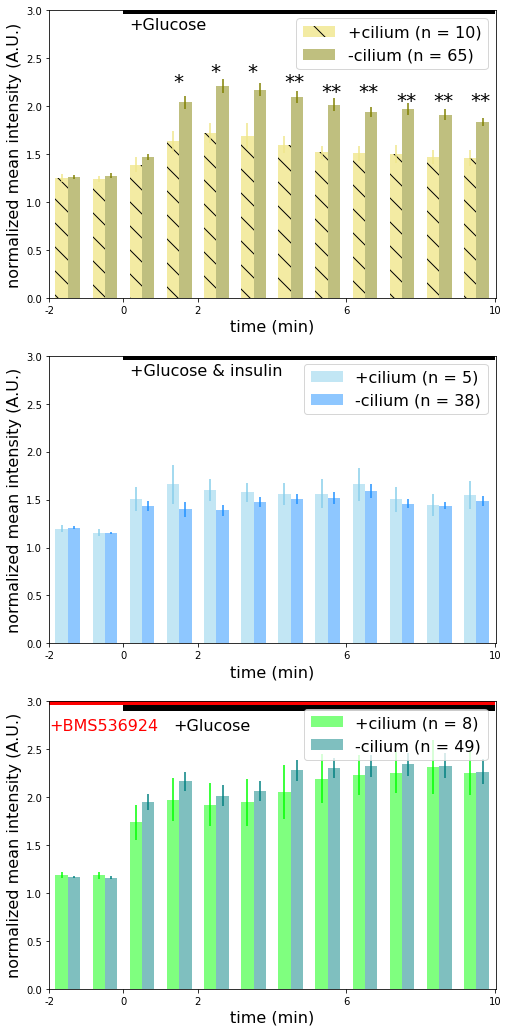

In [8]:
plt.figure(figsize = (8,18))

plt.subplot(311)
## wt cell data
glu_ciliated = pd.read_excel('12min_response.xlsx', sheet_name = '+cilium, +glucose', header = 1)
glu_nocilia = pd.read_excel('12min_response.xlsx', sheet_name = '-cilium, +glucose', header = 1)
time, ciliated_avg, ciliated_sd = Plot_avg_mean_overtime(glu_ciliated, 120, 60, False)
_, nocilia_avg, nocilia_sd = Plot_avg_mean_overtime(glu_nocilia, 120, 60, False)

plt.bar(time-10, ciliated_avg, width = 20, color = 'khaki', alpha = 0.8, label = "+cilium (n = 10)", hatch = '\\')
plt.errorbar(time-10, ciliated_avg, ciliated_sd, linestyle = '', color = 'khaki')
plt.bar(time+10, nocilia_avg, width = 20, color = 'olive', alpha = 0.5, label = "-cilium (n = 65)")
plt.errorbar(time+10, nocilia_avg, nocilia_sd, linestyle = '', color = 'olive')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 2.96, color = 'k')
plt.text(130, 2.8, '+Glucose', fontsize = 16)
plt.ylim([0, 3])

# * for p < 0.05
plt.text( 4*60-40, 2.2, '*', fontsize = 20 )
plt.text( 5*60-40, 2.3, '*', fontsize = 20 )
plt.text( 6*60-40, 2.3, '*', fontsize = 20 )
# ** for p < 0.01
plt.text( 7*60-40, 2.2, '**', fontsize = 20 )
plt.text( 8*60-40, 2.1, '**', fontsize = 20 )
plt.text( 9*60-40, 2.1, '**', fontsize = 20 )
plt.text( 10*60-40, 2, '**', fontsize = 20 )
plt.text( 11*60-40, 2, '**', fontsize = 20 )
plt.text( 12*60-40, 2, '**', fontsize = 20 )

plt.xlim([0, 721])
plt.xlabel('time (min)', fontsize = 16)
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 16)
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.legend(loc = 'upper right', fontsize = 16)


plt.subplot(312)
## +INS data
gluins_ciliated = pd.read_excel('12min_response.xlsx', sheet_name = '+cilium, +glucose & insulin', header = 1)
gluins_nocilia = pd.read_excel('12min_response.xlsx', sheet_name = '-cilium, +glucose & insulin', header = 1)
time, ciliated_avg, ciliated_sd = Plot_avg_mean_overtime(gluins_ciliated, 120, 60, False)
_, nocilia_avg, nocilia_sd = Plot_avg_mean_overtime(gluins_nocilia, 120, 60, False)

plt.bar(time-10, ciliated_avg, width = 20, color = 'skyblue', alpha = 0.5, label = "+cilium (n = 5)")
plt.errorbar(time-10, ciliated_avg, ciliated_sd, linestyle = '', color = 'skyblue')

plt.bar(time+10, nocilia_avg, width = 20, color = 'dodgerblue', alpha = 0.5, label = "-cilium (n = 38)")
plt.errorbar(time+10, nocilia_avg, nocilia_sd, linestyle = '', color = 'dodgerblue')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 2.96, color = 'k')
plt.text(130, 2.8, '+Glucose & insulin', fontsize = 16)
plt.ylim([0, 3])
plt.xlim([0, 721])
plt.xlabel('time (min)', fontsize = 16)
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 16)
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.legend(loc = 'upper right', fontsize = 16)

plt.subplot(313)
## +BMS data
glubms_ciliated = pd.read_excel('12min_response.xlsx', sheet_name = '+cilium, +glucose & bms', header = 1)
glubms_nocilia = pd.read_excel('12min_response.xlsx', sheet_name = '-cilium, +glucose & bms', header = 1)
time, ciliated_avg, ciliated_sd = Plot_avg_mean_overtime(glubms_ciliated, 120, 60, False)
_, nocilia_avg, nocilia_sd = Plot_avg_mean_overtime(glubms_nocilia, 120, 60, False)
n_ciliated = len(glubms_ciliated.columns)
n_nocilium = len(glubms_nocilia.columns)

plt.bar(time-10, ciliated_avg, width = 20, color = 'lime', alpha = 0.5, label = "+cilium (n = "+str(n_ciliated)+")")
plt.errorbar(time-10, ciliated_avg, ciliated_sd, linestyle = '', color = 'lime')

plt.bar(time+10, nocilia_avg, width = 20, color = 'teal', alpha = 0.5, label = "-cilium (n = "+str(n_nocilium)+")")
plt.errorbar(time+10, nocilia_avg, nocilia_sd, linestyle = '', color = 'teal')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 2.9, color = 'k')
plt.text(200, 2.7, '+Glucose', fontsize = 16)
plt.bar(np.array(range(0, 721, 1)), height = 0.1, width = 1, bottom = 2.96, color = 'r')
plt.text(0, 2.7, '+BMS536924', color = 'r', fontsize = 16)
plt.ylim([0, 3])
# plt.text( 4*60-40, 2.2, '*', fontsize = 20 )
plt.xlim([0, 721])
plt.xlabel('time (min)', fontsize = 16)
plt.ylabel('normalized mean intensity (A.U.)', fontsize = 16)
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.legend(loc = 'upper right', fontsize = 16)
plt.show()



In [4]:
# calculate p value, cells that are stimulated with glucose only, ciliated vs cilium-free
glu_ciliated = pd.read_excel('12min_response.xlsx', sheet_name = '+cilium, +glucose', header = 1)
glu_nocilia = pd.read_excel('12min_response.xlsx', sheet_name = '-cilium, +glucose', header = 1)
time, ciliated_avg, ciliated_sd = Plot_avg_mean_overtime(glu_ciliated, 120, 60, False)
_, nocilia_avg, nocilia_sd = Plot_avg_mean_overtime(glu_nocilia, 120, 60, False)


from scipy import stats

i = 1

for i in range(0, 12):
    print(i)
    print(stats.ttest_ind_from_stats(ciliated_avg[i], ciliated_sd[i]*np.sqrt(10), 10, nocilia_avg[i], nocilia_sd[i]*np.sqrt(65), 65, equal_var=True))
    


0
Ttest_indResult(statistic=-0.15025160601909004, pvalue=0.8809804942992648)
1
Ttest_indResult(statistic=-0.517537510860758, pvalue=0.6063457840244825)
2
Ttest_indResult(statistic=-0.9727140436628996, pvalue=0.33390762103050753)
3
Ttest_indResult(statistic=-2.306398208479868, pvalue=0.02392933180210843)
4
Ttest_indResult(statistic=-2.570639007884289, pvalue=0.01218926989814574)
5
Ttest_indResult(statistic=-2.584414380364472, pvalue=0.011752826922793537)
6
Ttest_indResult(statistic=-3.0736383761787374, pvalue=0.002972901690331655)
7
Ttest_indResult(statistic=-2.799126170325923, pvalue=0.0065510106132526)
8
Ttest_indResult(statistic=-3.0670406149229392, pvalue=0.0030315468797301203)
9
Ttest_indResult(statistic=-3.0186653978418945, pvalue=0.003495561246881609)
10
Ttest_indResult(statistic=-2.987002499203395, pvalue=0.0038341120373922206)
11
Ttest_indResult(statistic=-3.219572561975886, pvalue=0.0019170755829310579)


## siRNA data

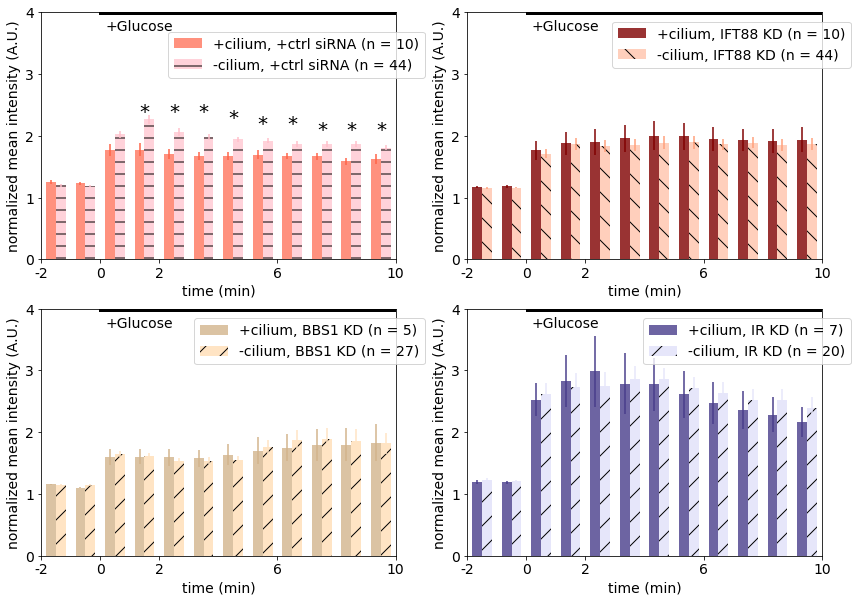

In [29]:
plt.figure(figsize = (14,10))
plt.rcParams["font.size"] = "14"


plt.subplot(221)
# +ctrl siRNA
glu_ctrl_ciliated = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'ctrl siRNA, +cilium', header = 1)
glu_ctrl_nocilia = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'ctrl siRNA, -cilium', header = 1)
time, ciliated_ctrl_avg, ciliated_ctrl_sd = Plot_avg_mean_overtime(glu_ctrl_ciliated, 120, 60, False)
_, nocilia_ctrl_avg, nocilia_ctrl_sd = Plot_avg_mean_overtime(glu_ctrl_nocilia, 120, 60, False)

plt.bar(time-10, ciliated_ctrl_avg, width = 20, color = 'Tomato', alpha = 0.7, label = "+cilium, +ctrl siRNA (n = " + str(n_ciliated) + ")")
plt.errorbar(time-10, ciliated_ctrl_avg, ciliated_ctrl_sd, linestyle = '', color = 'Tomato')

plt.bar(time+10, nocilia_ctrl_avg, width = 20, color = 'pink', alpha = 0.7, label = "-cilium, +ctrl siRNA (n = " +str(n_nocilium) + ")", hatch = '-')
plt.errorbar(time+10, nocilia_ctrl_avg, nocilia_ctrl_sd, linestyle = '', color = 'pink')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 3.95, color = 'k')
plt.text(130, 3.7, '+Glucose')
plt.ylim([0, 4])
plt.xlim([0, 721])
plt.xlabel('time (min)')
plt.ylabel('normalized mean intensity (A.U.)')
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.95))

# * for p < 0.05
plt.text( 4*60-40, 2.3, '*', fontsize = 20 )
plt.text( 5*60-40, 2.3, '*', fontsize = 20 )
plt.text( 6*60-40, 2.3, '*', fontsize = 20 )
plt.text( 7*60-40, 2.2, '*', fontsize = 20 )
plt.text( 8*60-40, 2.1, '*', fontsize = 20 )
plt.text( 9*60-40, 2.1, '*', fontsize = 20 )
plt.text( 10*60-40, 2, '*', fontsize = 20 )
plt.text( 11*60-40, 2, '*', fontsize = 20 )
plt.text( 12*60-40, 2, '*', fontsize = 20 )

plt.subplot(222)
# +IFT88 siRNA
glu_ift88_ciliated = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'ift88 siRNA, +cilium', header = 1)
glu_ift88_nocilia = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'ift88 siRNA, -cilium', header = 1)
n_ciliated = len(glu_ift88_ciliated.columns)
n_nocilium = len(glu_ift88_nocilia.columns)
time, ciliated_ift88_avg, ciliated_ift88_sd = Plot_avg_mean_overtime(glu_ift88_ciliated, 120, 60, False)
_, nocilia_ift88_avg, nocilia_ift88_sd = Plot_avg_mean_overtime(glu_ift88_nocilia, 120, 60, False)

plt.bar(time-10, ciliated_ift88_avg, width = 20, color = 'maroon', alpha = 0.8, label = "+cilium, IFT88 KD (n = " + str(n_ciliated) + ")")
plt.errorbar(time-10, ciliated_ift88_avg, ciliated_ift88_sd, linestyle = '', color = 'maroon')

plt.bar(time+10, nocilia_ift88_avg, width = 20, color = 'lightsalmon', alpha = 0.5, label = "-cilium, IFT88 KD (n = " +str(n_nocilium) + ")", hatch = '\\')
plt.errorbar(time+10, nocilia_ift88_avg, nocilia_ift88_sd, linestyle = '', color = 'lightsalmon')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 3.95, color = 'k')
plt.text(130, 3.7, '+Glucose')
plt.ylim([0, 4])
plt.xlim([0, 721])
plt.xlabel('time (min)')
plt.ylabel('normalized mean intensity (A.U.)')
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4]) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.99))

plt.subplot(223)
# +BBS1 siRNA
glu_bbs1_ciliated = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'bbs1 siRNA, +cilium', header = 1)
glu_bbs1_nocilia = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'bbs1 siRNA, -cilium', header = 1)
time, ciliated_bbs1_avg, ciliated_bbs1_sd = Plot_avg_mean_overtime(glu_bbs1_ciliated, 120, 60, False)
_, nocilia_bbs1_avg, nocilia_bbs1_sd = Plot_avg_mean_overtime(glu_bbs1_nocilia, 120, 60, False)
plt.bar(time-10, ciliated_bbs1_avg, width = 20, color = 'tan', alpha = 0.8, label = "+cilium, BBS1 KD (n = 5)")
plt.errorbar(time-10, ciliated_bbs1_avg, ciliated_bbs1_sd, linestyle = '', color = 'tan')

plt.bar(time+10, nocilia_bbs1_avg, width = 20, color = 'bisque', alpha = 1, label = "-cilium, BBS1 KD (n = 27)", hatch = '/')
plt.errorbar(time+10, nocilia_bbs1_avg, nocilia_bbs1_sd, linestyle = '', color = 'bisque')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 3.95, color = 'k')
plt.text(130, 3.7, '+Glucose')
plt.ylim([0, 4])
plt.xlim([0, 721])
plt.xlabel('time (min)')
plt.ylabel('normalized mean intensity (A.U.)')
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4]) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.99))

plt.subplot(224)
## +InsR siRNA
glu_InsR_ciliated = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'InsR siRNA, +cilium', header = 1)
glu_InsR_nocilia = pd.read_excel('12min_siRNA.xlsx', sheet_name = 'InsR siRNA, -cilium', header = 1)
time, ciliated_InsR_avg, ciliated_InsR_sd = Plot_avg_mean_overtime(glu_InsR_ciliated, 120, 60, False)
_, nocilia_InsR_avg, nocilia_InsR_sd = Plot_avg_mean_overtime(glu_InsR_nocilia, 120, 60, False)

plt.bar(time-10, ciliated_InsR_avg, width = 20, color = 'darkslateblue', alpha = 0.8, label = "+cilium, IR KD (n = 7)")
plt.errorbar(time-10, ciliated_InsR_avg, ciliated_InsR_sd, linestyle = '', color = 'darkslateblue')

plt.bar(time+10, nocilia_InsR_avg, width = 20, color = 'lavender', alpha = 1, label = "-cilium, IR KD (n = 20)", hatch = '/')
plt.errorbar(time+10, nocilia_InsR_avg, nocilia_InsR_sd, linestyle = '', color = 'lavender')

plt.bar(np.array(range(119, 721, 1)), height = 0.1, width = 1, bottom = 3.95, color = 'k')
plt.text(130, 3.7, '+Glucose')
plt.ylim([0, 4])
plt.xlim([0, 721])
plt.xlabel('time (min)')
plt.ylabel('normalized mean intensity (A.U.)')
plt.xticks([0, 120, 240, 480, 720], [-2, 0, 2, 6, 10]) # convert time into minute
plt.yticks([0, 1, 2, 3, 4], [0, 1, 2, 3, 4]) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1, 0.99))
         
plt.show()